In [1]:
# coding: utf-8    #  par défaut l'encoding est en utf-8 pour python 3

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import re
import time
from sklearn import decomposition
from sklearn import preprocessing
import seaborn
import statsmodels.formula.api as smf
from math import *

import sklearn

In [2]:
# vérification de la version
print(sklearn.__version__) # 0.22

0.22


In [3]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

In [4]:
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_column', 200)
pd.set_option('display.column_space', 200)

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 20

<IPython.core.display.Javascript object>

In [6]:
# Liste de tous les produits de tous les pays

# Décompte du temps que prend le chargement:
start_time = time.time()
print("\n\nTemps estimé pour le chargement de la base: 47 secondes\n")

# Encodage = Unicode UTF-8. The character that separates fields is <tab> (tabulation).
food = pd.read_csv("openfoodfacts.csv", sep='\t') 
print(food.shape)                                  # (1409722, 181)
food.head(2)

# Temps réel:
print("Temps réel : %s secondes ---" % (time.time() - start_time))




Temps estimé pour le chargement de la base: 47 secondes



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,19,20,24,25,26,28,49,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1409722, 181)
Temps réel : 47.75009632110596 secondes ---


### Volumétrie

In [ ]:
print(food.shape[0],"produits")
print(food.shape[1],"variables")

print("\nType des variables:\n", food.dtypes.value_counts())
# 125  var. numériques
# 56   var. catégorielles

In [ ]:
# Répartition des colonnes textes et numériques :

food.dtypes.value_counts().plot.pie()


In [ ]:
# Signification des variables catégorielles de type Object (texte) :

for col in food.select_dtypes('object'):
    print(f'{col :-<40} {food[col].unique()}')

# Toutes ces variables sont des chaînes de caractères complexes, difficiles à traiter.
# On peut conserver 'code' (code) et 'product_name' (nom du produit)
#
# 'ingredients_text' est intéressant mais il faut le décripter


### Sélection des produits vendus en France

In [7]:
# Filtrage sur les produits vendus en France avec la colonne 'countries' :
#   {'en:france' , 'en:fr' , 'en:FR' , 'en:French' , 'France' , 'Frankreich' , 'Francia' , 'Francja'}

print("Taille food avant sélection de la France:",len(food))
food = food[food.countries.str.contains(r'en:france|en:fr|en:FR|en:French|France|Frankreich|Francia|Francja', na=False)]
print("Taille food après sélection de la France:",len(food))

# food.countries.unique().tolist()   # Vérification

Taille food avant sélection de la France: 1409722
Taille food après sélection de la France: 692273


### % de valeurs manquantes / colonne

In [258]:
(food.isna().sum()/food.shape[0]).sort_values(ascending=True)*100


code                                            0.000000
url                                             0.000000
created_t                                       0.000000
created_datetime                                0.000000
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
countries                                       0.000000
countries_tags                                  0.000000
states                                          0.000000
states_tags                                     0.000000
states_en                                       0.000000
countries_en                                    0.000000
creator                                         0.000144
pnns_groups_2                                   0.029179
pnns_groups_1                                   1.368535
product_name                                    2.603597
image_url                                      11.022963
image_small_url                

In [8]:
# 2.  Eliminations des colonnes avec un % données manquantes > 90% sauf exception :

food = food.drop(['cities_tags', 'manufacturing_places', 'manufacturing_places_tags', 'energy-kj_100g', 
'first_packaging_code_geo', 'traces', 'origins', 'origins_tags', 'carbon-footprint-from-meat-or-fish_100g', 
'calcium_100g', 'iron_100g', 'cocoa_100g', 
'brand_owner', 'trans-fat_100g', 'cholesterol_100g', 'polyunsaturated-fat_100g', 'monounsaturated-fat_100g', 'potassium_100g', 
'magnesium_100g', 'phosphorus_100g', 'omega-3-fat_100g', 'zinc_100g', 
'pantothenic-acid_100g', 'polyols_100g', 'chloride_100g', 'biotin_100g', 'manganese_100g', 'copper_100g', 'iodine_100g', 
'carbon-footprint_100g', 'collagen-meat-protein-ratio_100g', '-alpha-linolenic-acid_100g', 'starch_100g', 'selenium_100g', 
'omega-6-fat_100g', 'fruits-vegetables-nuts-dried_100g', 'folates_100g', 'bicarbonate_100g', '-lactose_100g', 
'-linoleic-acid_100g', '-soluble-fiber_100g', '-insoluble-fiber_100g', 'fluoride_100g', 'energy-from-fat_100g', 
'ph_100g', 'caffeine_100g', '-docosahexaenoic-acid_100g', 'silica_100g', '-eicosapentaenoic-acid_100g', 'taurine_100g', 
'-fructose_100g', 'beta-carotene_100g', 'chromium_100g', 'casein_100g', 'omega-9-fat_100g', 'molybdenum_100g', 'choline_100g', 
'phylloquinone_100g', 'serum-proteins_100g', '-sucrose_100g', 'inositol_100g', '-glucose_100g', '-arachidonic-acid_100g', 
'nutrition-score-uk_100g', '-maltodextrins_100g', '-arachidic-acid_100g', 'beta-glucan_100g', 'carnitine_100g',
'-oleic-acid_100g', 'nucleotides_100g', '-maltose_100g', '-behenic-acid_100g', '-lauric-acid_100g',
'-gamma-linolenic-acid_100g', 'glycemic-index_100g', '-montanic-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g', 
'-butyric-acid_100g', 'no_nutriments', '-dihomo-gamma-linolenic-acid_100g', 'cities', 'allergens_en', '-elaidic-acid_100g', 
'water-hardness_100g', '-gondoic-acid_100g', 'ingredients_from_palm_oil', '-mead-acid_100g', '-erucic-acid_100g', 
'-nervonic-acid_100g', '-lignoceric-acid_100g', '-stearic-acid_100g', '-palmitic-acid_100g', '-myristic-acid_100g', 
'-capric-acid_100g', '-caprylic-acid_100g', 'ingredients_that_may_be_from_palm_oil', '-caproic-acid_100g', 'additives', 
'alcohol_100g', 'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts_100g',
'-melissic-acid_100g', 'ingredients_from_palm_oil_tags'], 1) 

print("Shape aprés :", food.shape)


Shape aprés : (692273, 77)


In [9]:
# 2.  Eliminations des colonnes sans intérêt pour l'application :

food = food.drop(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
 'brands', 'quantity', 'packaging', 'packaging_tags', 'brands_tags', 'categories_tags', 'categories_en',
 'generic_name', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'purchase_places', 'stores',  
 'energy-kcal_100g', 'ingredients_that_may_be_from_palm_oil_tags', 
 'countries', 'countries_tags', 'countries_en', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 
 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'allergens', 
 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 
 'categories', 'ingredients_text', 'nutrition-score-fr_100g',
 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url'], 1) 

print("Shape aprés :", food.shape)                                 # (692273, 31)


Shape aprés : (692273, 25)


In [10]:
# Sommer les vitamines en une seule colonne :

food['vitamine'] = (food[['vitamin-a_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b9_100g',
                        'vitamin-b12_100g', 'vitamin-c_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 
                        'vitamin-pp_100g']].sum(axis=1))                                 # sum() ne tient pas compte des NaN

food = food.drop(['vitamin-a_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 
                  'vitamin-b12_100g', 'vitamin-c_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 
                  'vitamin-pp_100g'], 1)


### Renommage des colonnes

In [11]:
food.columns = ['code', 'produit', 'additif', 'nutriscore', 'nutrigrade', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
food.head(2)


,code,produit,additif,nutriscore,nutrigrade,energy,gras,grasat,glucides,sucres,fibres,proteins,sel,sodium,vitamine
0,0000000000017,Vitória crackers,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,0.0
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# % de données manquantes par colonne :

(food.isna().sum()/food.shape[0]).sort_values(ascending=True)*100

<Figure size 2160x2160 with 0 Axes>

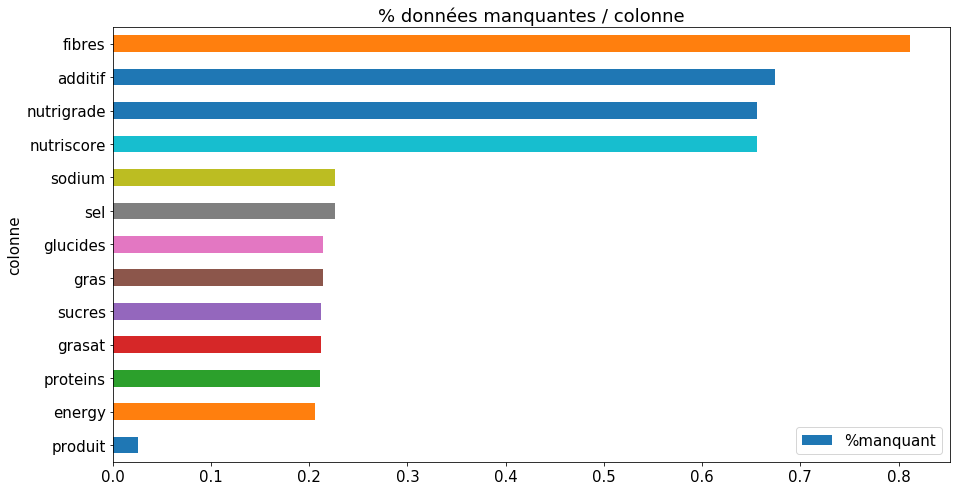

In [13]:
def plot_missing_values(df):

    fig = plt.figure(figsize = (30, 30))
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['colonne', '%manquant']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('%manquant')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='colonne', y='%manquant'); 
    plt.title('% données manquantes / colonne');
    plt.savefig( "missing_value.png", dpi=50 )
    plt.show()
    
plot_missing_values(food)


## Nettoyage

In [19]:
# ------------ Règles de suppression des Produits  -------------


# 1. Produits dont la somme des valeurs des champs 'xxx_100g' > 100g

# 2. Produits avec les Incohérences :  'saturated-fat_100g' > 'fat_100g'       OU
#                                      'sugars_100g' > 'carbohydrates_100g'    OU
#                                      'sodium_100g' > 'salt_100g'

# 3. Produits dont au moins UN des champs 'xxx_100g' > 100g

# 4. Suprimmer les produits ou tous les champs 'xxx_100g' = NaN

# 5. Eliminer les produits dont 'energy' = NaN

# 6. Eliminer les produits ou 'nutrigrade' =  NaN 
#    => évite de faire l'imputation du nutriscore et la détermination du nutrigrade


In [12]:

# 1 .........
print("Taille food avant Trt. Sup > 100:",len(food))
food = food[food[['gras', 'glucides', 'fibres', 'proteins', 'sel', 'vitamine']].sum(axis=1) <= 100]  # sum ne traite pas les NaN
print("Taille food après Trt. Sup > 100:",len(food))
print("\n")
# Ajouter les vitamines ont permis de faire apparaître un produit abbérant


# 2 .........
def get_coherent(col_inf, col_sup):
    if (np.isfinite(col_inf)  & np.isfinite(col_sup)):
        if (col_inf > col_sup):
            return 0
    return 1

print("Taille food avant Trt. Graisses:",len(food))   # 686968
food['col_coherent'] = list(map(get_coherent, food['grasat'], food['gras']))
food = food[food['col_coherent'] == 1]
food = food.drop(['col_coherent'], 1)
print("Taille food après Trt. Graisses:",len(food))   # 686756

print("Taille food avant Trt. Sucres:",len(food))   # 686756
food['col_coherent'] = list(map(get_coherent, food['sucres'], food['glucides']))
food = food[food['col_coherent'] == 1]
food = food.drop(['col_coherent'], 1)
print("Taille food après Trt. Sucres:",len(food))   # 686595

print("Taille food avant Trt. Sel:",len(food))   # 686595
food['col_coherent'] = list(map(get_coherent, food['sodium'], food['sel']))
food = food[food['col_coherent'] == 1]
food = food.drop(['col_coherent'], 1)
print("Taille food après Trt. Sel:",len(food))   # 686582
print("\n")


# 3 .........
def inf_cent(col):
    if (np.isfinite(col)):
        if (col > 100):
            return 0
    return 1

print("Taille food avant Trt. gras:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['gras']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. grasat:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['grasat']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. glucides:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['glucides']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. sucres:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['sucres']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. fibres:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['fibres']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. proteins:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['proteins']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. sel:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['sel']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)

print("Taille food avant Trt. sodium:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['sodium']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)
print("Taille food aprés Trt. sodium:",len(food)) 

print("Taille food avant Trt. vitamine:",len(food)) 
food['col_cent'] = list(map(inf_cent, food['vitamine']))
food = food[food['col_cent'] == 1]
food = food.drop(['col_cent'], 1)
print("Taille food aprés Trt. vitamine:",len(food)) 


# 4 .........
tous_nan = (food['gras'].isnull() & food['grasat'].isnull() & food['glucides'].isnull() & food['sucres'].isnull() & 
            food['fibres'].isnull() & food['proteins'].isnull() & food['sel'].isnull() & food['sodium'].isnull())

print("Taille food avant Trt. tous_nan:",len(food))
food = food.drop(food[tous_nan].index)
print("Taille food après Trt. tous_nan:",len(food))


# 5 .........
print("Taille food avant Trt. energy_nan:",len(food))
food = food.drop(food[food['energy'].isnull() | food['energy'] == 0].index)
print("Taille food après Trt. energy_nan:",len(food))


# 6 .........
print("Taille food avant Trt. nutrigrade_nan:",len(food))
food = food.drop(food[food['nutrigrade'].isnull()].index)
print("Taille food après Trt. nutrigrade_nan:",len(food))


Taille food avant Trt. Sup > 100: 692273
Taille food après Trt. Sup > 100: 686777


Taille food avant Trt. Graisses: 686777
Taille food après Trt. Graisses: 686565
Taille food avant Trt. Sucres: 686565
Taille food après Trt. Sucres: 686404
Taille food avant Trt. Sel: 686404
Taille food après Trt. Sel: 686391


Taille food avant Trt. gras: 686391
Taille food avant Trt. grasat: 686391
Taille food avant Trt. glucides: 686390
Taille food avant Trt. sucres: 686390
Taille food avant Trt. fibres: 686390
Taille food avant Trt. proteins: 686390
Taille food avant Trt. sel: 686390
Taille food avant Trt. sodium: 686390
Taille food aprés Trt. sodium: 686390
Taille food avant Trt. vitamine: 686390
Taille food aprés Trt. vitamine: 686390
Taille food avant Trt. tous_nan: 686390
Taille food après Trt. tous_nan: 549547
Taille food avant Trt. energy_nan: 549547
Taille food après Trt. energy_nan: 536883
Taille food avant Trt. nutrigrade_nan: 536883
Taille food après Trt. nutrigrade_nan: 232413


In [14]:
apresNET = food.copy()   # sauvegarde

In [15]:
food = apresNET.copy()   # restore

In [99]:
# % de données manquantes par colonne :
(food.isna().sum()/food.shape[0]).sort_values(ascending=True)*100


code           0.000000
nutriscore     0.000000
nutrigrade     0.000000
vitamine       0.000000
sel            0.006454
sodium         0.006454
proteins       0.063680
gras           0.064110
grasat         0.064540
sucres         0.064971
energy         0.068413
glucides       0.110149
produit        0.285698
additif       37.166165
fibres        61.797318
dtype: float64

## Calcul du nutriscore :  option non retenue

In [ ]:
# l_energy = [335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350]
# l_sugars = [4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45]
# l_saturated_fat = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# l_sodium = [0.090, 0.180, 0.270, 0.360, 0.450, 0.540, 0.630, 0.720, 0.810, 0.900]
# l_fibers = [0.9, 1.9, 2.8, 3.7, 4.7]
# l_proteins = [1.6, 3.2, 4.8, 6.4, 8]


# def calcul_nutriscore(nutriscore, energy, sugars, saturated_fat, sodium, fibers, proteins):
    
#     if nutriscore > 0:
#         return nutriscore   # nutriscore déjà renseigné => on ne le calcule pas.
    
#     # 1. Calcul des points negatifs :
#     negatif=0
#     if np.isfinite(energy):          # calcul possible si energy != NaN 
#         for i in range(len(l_energy)):
#             if energy <= l_energy[i]:
#                 negatif += i
#                 break                # le nombre de point a été trouvé, c'est l'indice 'i' de la liste l_energy
#     if np.isfinite(sugars):
#         for i in range(len(l_sugars)):
#             if sugars <= l_sugars[i]:
#                 negatif += i
#                 break
#     if np.isfinite(saturated_fat):
#         for i in range(len(l_saturated_fat)):
#             if saturated_fat <= l_saturated_fat[i]:
#                 negatif += i
#                 break
#     if np.isfinite(sodium):
#         for i in range(len(l_sodium)):
#             if sodium <= l_sodium[i]:
#                 negatif += i
#                 break
      
#     # 2. Calcul des points positifs :
#     positif=0
#     if np.isfinite(fibers):
#         for i in range(len(l_fibers)):
#             if fibers <= l_fibers[i]:
#                 positif += i
#                 break
#     # proteins
#     if np.isfinite(proteins):
#         for i in range(len(l_proteins)):
#             if proteins <= l_proteins[i]:
#                 positif += i
#                 break           
#     return (negatif-positif)

# food['nutriscore'] = list(map(calcul_nutriscore, 
#                                 food['nutriscore'],
#                                 food['energy'], food['sucres'], food['grasat'], food['sodium'],
#                                 food['fibres'], food['proteins']))    #  +FRUITS


In [13]:
# Pour la suite, Lorsque un champs Quant= NaN, on lui assigne 0.

colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']

for col in colonnes:      
    food[col].fillna(0, inplace=True)


## Imputation des données manquantes : option non retenue

In [ ]:
#  !  Imputation nécessaire si le point (6.) du nettoyage n'a pas été effectué  !
#
#  n.b:  Seul 'nutriscore' a besoin d'être imputé.


# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.neighbors import KNeighborsRegressor


# Temps pour l'imputation :
# start_time = time.time()
# print("\n\nTemps d\'execution estimé pour l'imputation: 25 secondes\n")

# Variables qualitatives:
# qual = food[['code', 'produit', 'nutrigrade']]


# OPTION 1 :  entraîner avec des produits ou toutes les colonnes sont renseignées :  78980
# X_train = food[np.isfinite(food['additif']) & np.isfinite(food['nutriscore']) & np.isfinite(food['energy']) &
#      np.isfinite(food['gras']) & np.isfinite(food['grasat']) & np.isfinite(food['glucides']) &
#      np.isfinite(food['sucres']) & np.isfinite(food['fibres']) & np.isfinite(food['proteins']) &
#      np.isfinite(food['sel']) & np.isfinite(food['sodium']) & np.isfinite(food['vitamine']) ]
# X_train = X_train[['additif', 'nutriscore', 'energy', 'gras', 'grasat', 'glucides', 
#                    'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']]


# OPTION 2 :  entraîner avec des produits pris au hasard parmi ceux dont le nutriscore existe
# X_train = food[np.isfinite(food['nutriscore']) ]
# X_train = X_train.sample(100000)


# OPTION 3 :  entraîner avec un % équivalent du nutrigrade :
# d    0.309610
# c    0.209326
# e    0.190400
# a    0.162112
# b    0.128552
# X_train_a = food[food['nutrigrade'] == 'a']
# X_train_b = food[food['nutrigrade'] == 'b']
# X_train_c = food[food['nutrigrade'] == 'c']
# X_train_d = food[food['nutrigrade'] == 'd']
# X_train_e = food[food['nutrigrade'] == 'e']
# X_train_a = X_train_a.sample(20000)
# X_train_b = X_train_b.sample(20000)
# X_train_c = X_train_c.sample(20000)
# X_train_d = X_train_d.sample(20000)
# X_train_e = X_train_e.sample(20000)
# X_train =  pd.concat([pd.concat([pd.concat([pd.concat([X_train_a, X_train_b]), X_train_c]), X_train_d]), X_train_e])


# Sélection des variables quantitatives :
# X_train = X_train[['additif', 'nutriscore', 'energy', 'gras', 'grasat', 'glucides',
#                    'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']]
# X_test = food[['additif', 'nutriscore', 'energy', 'gras', 'grasat', 'glucides',
#                    'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']]


# estimator = KNeighborsRegressor(n_neighbors=5)
# imputer = IterativeImputer(estimator)
# imputer.fit(X_train)                      # Choisir la bonne taille de X_train sinon le process est infini
# quant_tr = imputer.transform(X_test)


# ----- Recréer le dataframe food:
# col = ['additif', 'nutriscore', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 
#        'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
# quant = pd.DataFrame(quant_tr ,columns=col)   
# print("Taille de quant=", len(quant), ",  de qual=", len(qual))

# Concaténation des colonnes Qualitatives avec les colonnes Quantitatives qui viennent d'être imputées
# food = pd.concat([qual.reset_index(drop=True), quant.reset_index(drop=True)], axis = 1)


# Temps nécessaire à ce traitement
# print("Temps d\'execution : %s secondes ---" % (time.time() - start_time))


### Détermination du nutrigrade en fonction du nutriscore : option non retenue

In [ ]:
#  !  Calcul nécessaire si le point (6.) du nettoyage n'a pas été effectué  !


# l_score = [0, 3, 11, 19, 41]
# l_grade = ['a', 'b', 'c', 'd', 'e']    # ex: nutriscore=2, 2<3 donc le grade est 'b'

# def calcul_nutrigrade(nutrigrade, nutriscore):
#     if nutrigrade in l_grade:
#         return nutrigrade       # nutrigrade déjà renseigné, on le retourne tel quel.
    
#     for i in range(len(l_score)):
#             if nutriscore < l_score[i]:
#                 return l_grade[i]
    

# food['nutrigrade'] = list(map(calcul_nutrigrade, food['nutrigrade'], food['nutriscore']))


## Statistiques

In [16]:
food.describe().round(3)


,additif,nutriscore,energy,gras,grasat,glucides,sucres,fibres,proteins,sel,sodium,vitamine
count,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000,232413.000
mean,1.099,9.636,1166.276,15.204,5.912,25.155,12.740,1.027,8.697,0.995,0.398,0.003
std,2.074,8.779,792.873,18.264,8.526,26.419,18.462,2.793,8.795,2.057,0.823,0.260
min,0.000,-15.000,0.000,0.000,0.000,0.000,-0.100,0.000,0.000,0.000,0.000,0.000
25%,0.000,2.000,490.000,1.400,0.300,2.500,0.700,0.000,1.900,0.090,0.036,0.000
50%,0.000,11.000,1075.000,8.930,2.300,12.200,3.500,0.000,6.300,0.600,0.240,0.000
75%,1.000,16.000,1682.000,24.000,8.800,49.300,17.000,0.700,12.600,1.300,0.520,0.000
max,30.000,40.000,19305.000,100.000,100.000,100.000,100.000,91.380,95.000,97.712,39.085,48.000


In [17]:
# ... et la médiane :
food.median()


code          3.372901e+12
additif       0.000000e+00
nutriscore    1.100000e+01
energy        1.075000e+03
gras          8.930000e+00
grasat        2.300000e+00
glucides      1.220000e+01
sucres        3.500000e+00
fibres        0.000000e+00
proteins      6.300000e+00
sel           6.000000e-01
sodium        2.400000e-01
vitamine      0.000000e+00
dtype: float64

## Analyse univariée

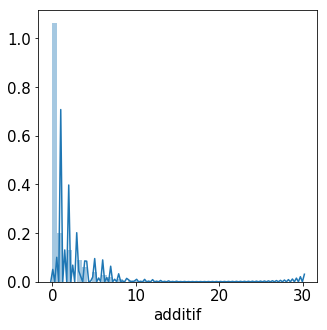

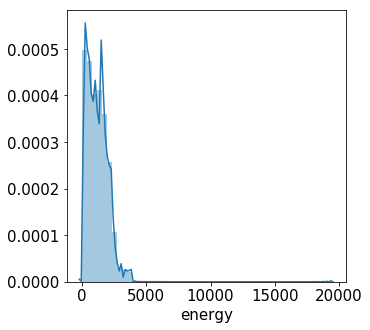

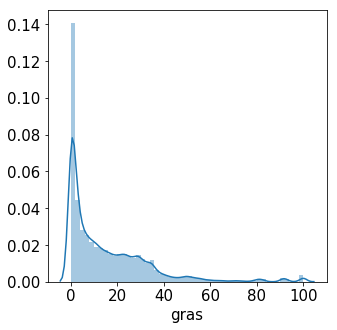

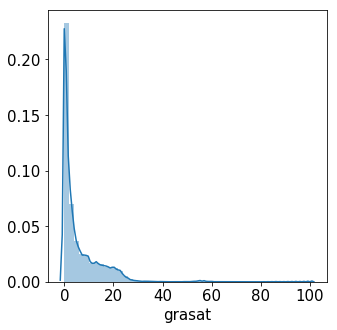

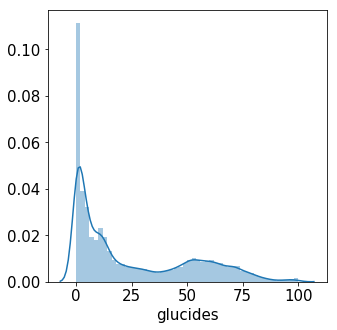

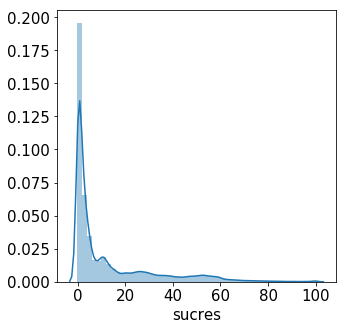

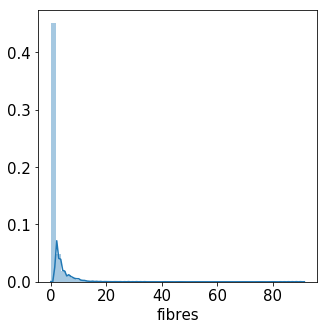

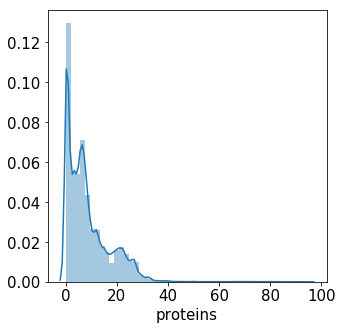

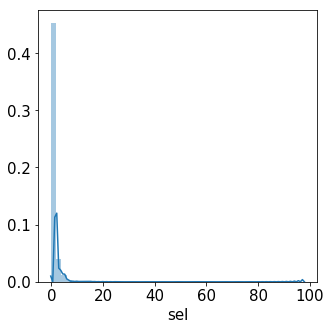

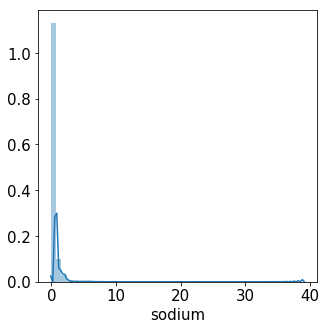

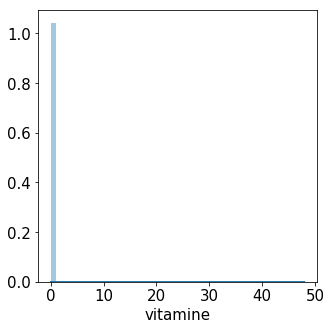

In [18]:
# Histogramme des variables quantitatives :

colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
nb=1

for col in colonnes:    
    fig = plt.figure(figsize = (5, 5))
    sns.distplot(food[col])
    nomFig = "distplot{0}.png".format(nb)
    plt.savefig(nomFig, dpi=50 )
    nb +=1


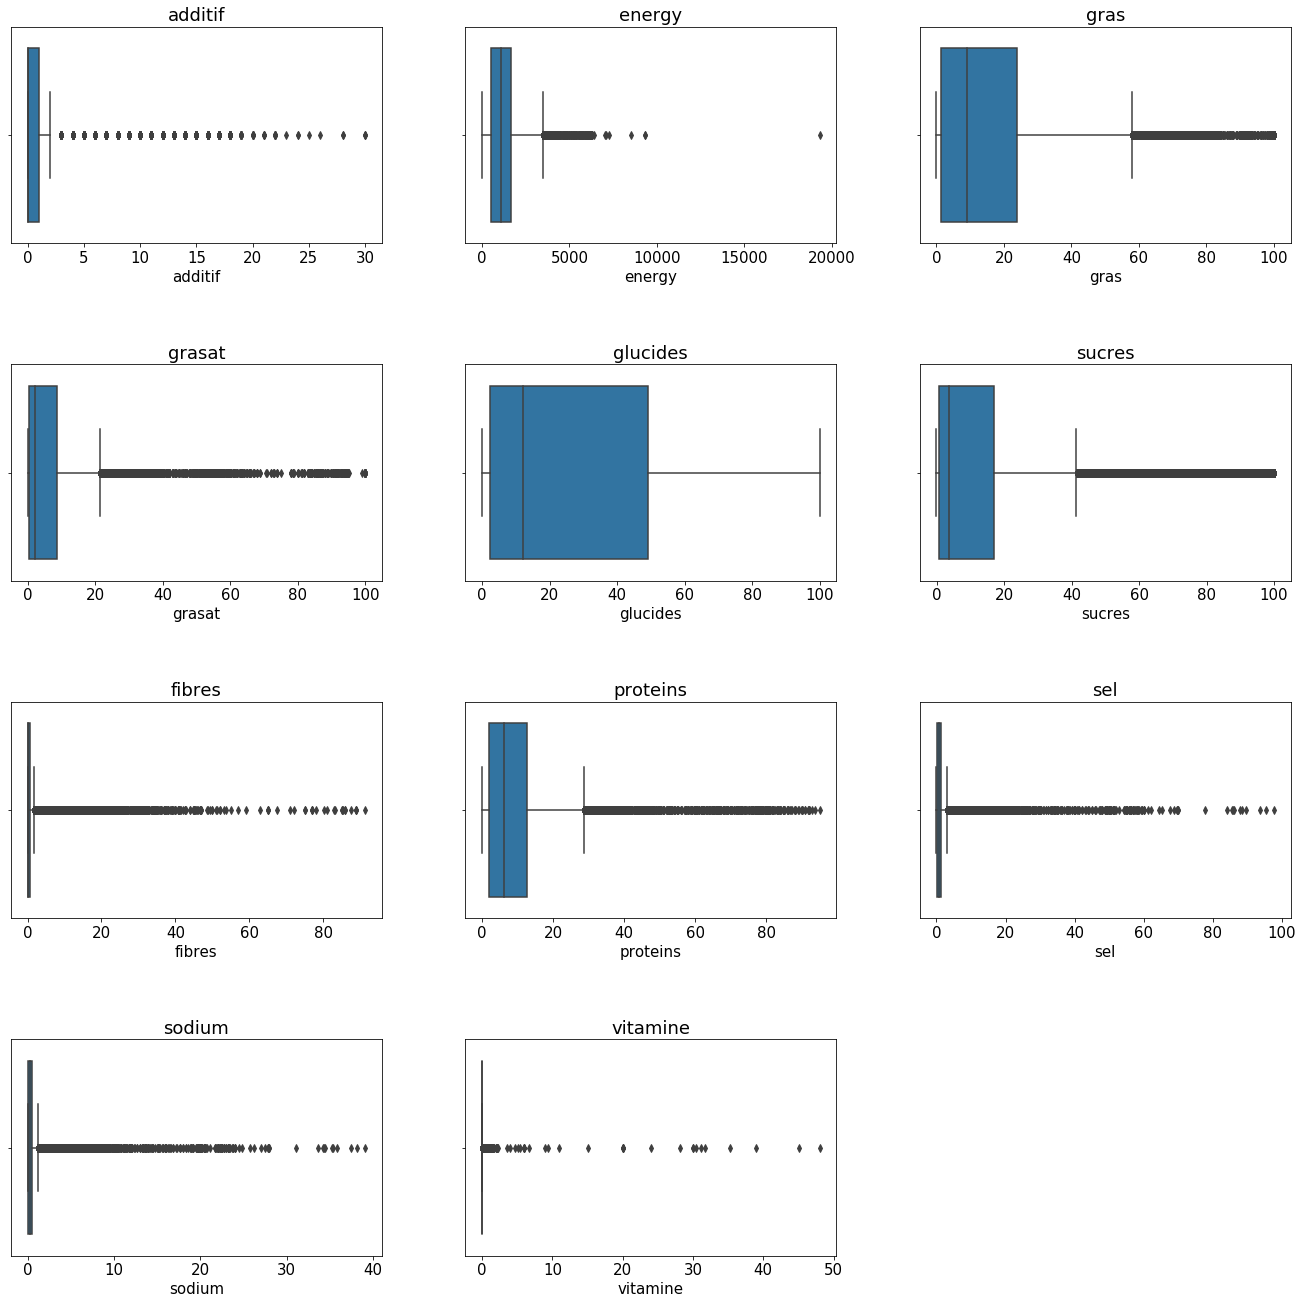

In [23]:
colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']

num=0

fig = plt.figure(figsize = (20, 20))   # largeur,hauteur

for col in colonnes:      
    plt.subplot(4,3, num+1)
    plt.title(colonnes[num])
    sns.boxplot(x=colonnes[num], data=food)
    num+=1

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges
plt.savefig( "boxplot.png", dpi=50 )
plt.show()


## Analyse bivariée

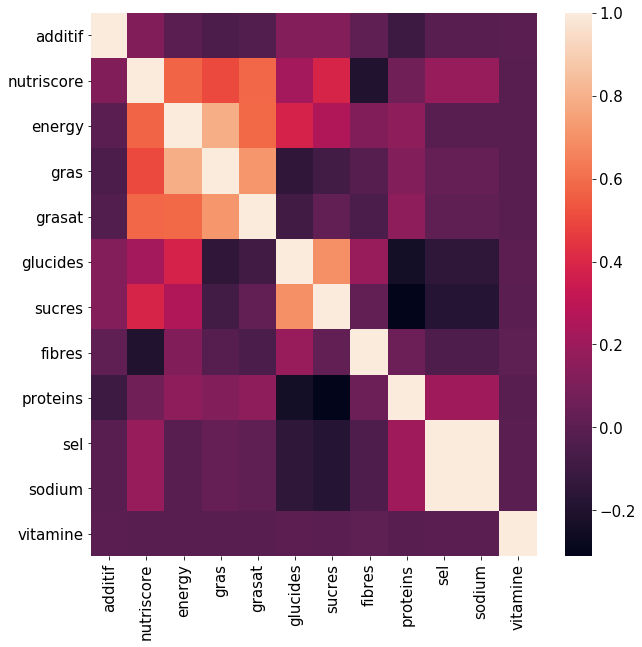

,additif,nutriscore,energy,gras,grasat,glucides,sucres,fibres,proteins,sel,sodium,vitamine
additif,1.000000,0.115945,-0.001516,-0.050259,-0.034746,0.125255,0.125613,0.011760,-0.101780,-0.005514,-0.005526,0.000855
nutriscore,0.115945,1.000000,0.573530,0.498039,0.584182,0.220868,0.387689,-0.198421,0.069772,0.182711,0.182706,-0.009003
energy,-0.001516,0.573530,1.000000,0.794083,0.588491,0.382413,0.257378,0.117450,0.159308,-0.014360,-0.014368,-0.006382
gras,-0.050259,0.498039,0.794083,1.000000,0.714962,-0.143772,-0.080809,-0.016019,0.123583,0.033319,0.033308,-0.007404
grasat,-0.034746,0.584182,0.588491,0.714962,1.000000,-0.083571,0.016791,-0.054498,0.154713,0.012050,0.012044,-0.006559
glucides,0.125255,0.220868,0.382413,-0.143772,-0.083571,1.000000,0.697345,0.187140,-0.240998,-0.152487,-0.152488,0.001457
sucres,0.125613,0.387689,0.257378,-0.080809,0.016791,0.697345,1.000000,0.019823,-0.311561,-0.178497,-0.178505,-0.000985
fibres,0.011760,-0.198421,0.117450,-0.016019,-0.054498,0.187140,0.019823,1.000000,0.049924,-0.041227,-0.041228,0.007589
proteins,-0.101780,0.069772,0.159308,0.123583,0.154713,-0.240998,-0.311561,0.049924,1.000000,0.207897,0.207904,-0.004915
sel,-0.005514,0.182711,-0.014360,0.033319,0.012050,-0.152487,-0.178497,-0.041227,0.207897,1.000000,0.999995,-0.003624


In [21]:
# Matrice de corrélation heatmap :

fig = plt.figure(figsize = (10, 10))
sns.heatmap(food.corr())   # Graphique
plt.savefig( "heat.png", dpi=50 )
plt.show()

food.corr()                # Statistiques


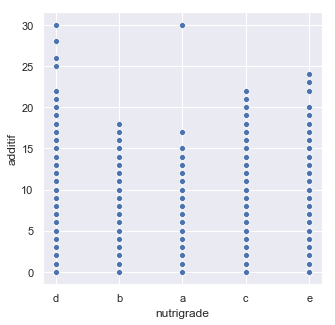

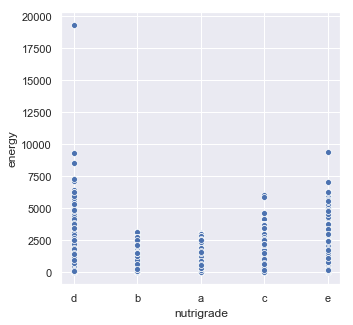

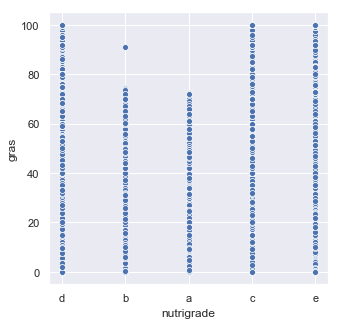

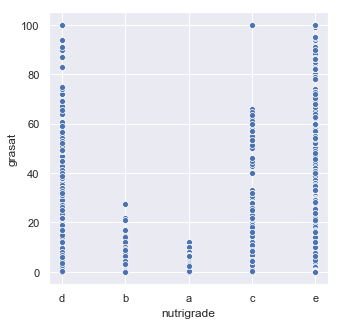

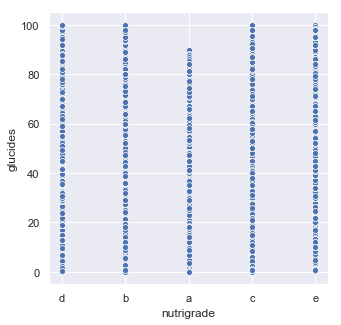

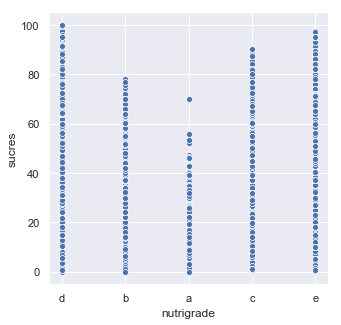

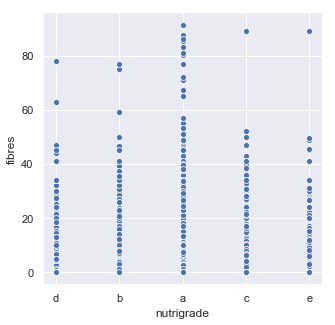

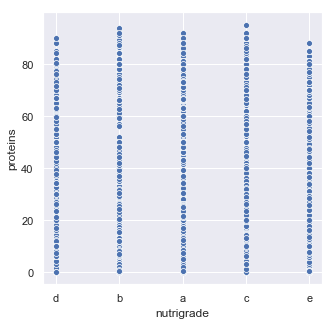

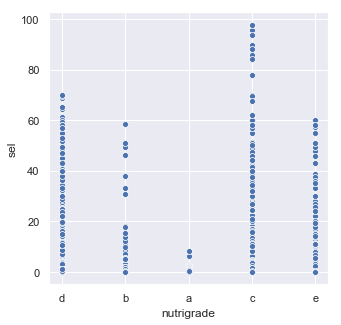

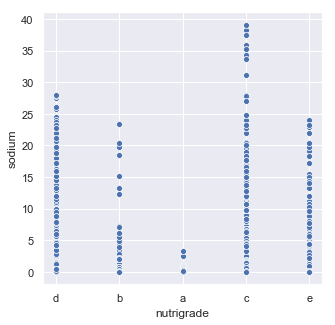

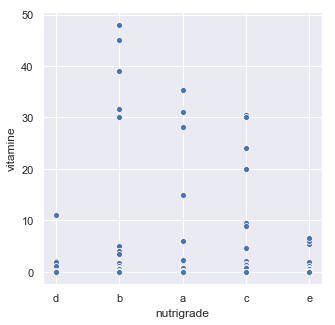

In [22]:
# Toutes les combinaisons de corrélation entre 'nutrigrade' et les variables quantitatives :
sns.set()

fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="additif", data=food)
ax.set(xlabel='nutrigrade', ylabel='additif')
plt.savefig( "nutrigrade1.png", dpi=50 )
plt.show()

fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="energy", data=food)
ax.set(xlabel='nutrigrade', ylabel='energy')
plt.savefig( "nutrigrade2.png", dpi=50 )
plt.show()

fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="gras", data=food)
ax.set(xlabel='nutrigrade', ylabel='gras')
plt.savefig( "nutrigrade3.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="grasat", data=food)
ax.set(xlabel='nutrigrade', ylabel='grasat')
plt.savefig( "nutrigrade4.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="glucides", data=food)
ax.set(xlabel='nutrigrade', ylabel='glucides')
plt.savefig( "nutrigrade5.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="sucres", data=food)
ax.set(xlabel='nutrigrade', ylabel='sucres')
plt.savefig( "nutrigrade6.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="fibres", data=food)
ax.set(xlabel='nutrigrade', ylabel='fibres')
plt.savefig( "nutrigrade7.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="proteins", data=food)
ax.set(xlabel='nutrigrade', ylabel='proteins')
plt.savefig( "nutrigrade8.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="sel", data=food)
ax.set(xlabel='nutrigrade', ylabel='sel')
plt.savefig( "nutrigrade9.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="sodium", data=food)
ax.set(xlabel='nutrigrade', ylabel='sodium')
plt.savefig( "nutrigrade10.png", dpi=50 )
plt.show()


fig = plt.figure(figsize = (5, 5))
ax = sns.scatterplot(x="nutrigrade", y="vitamine", data=food)
ax.set(xlabel='nutrigrade', ylabel='vitamine')
plt.savefig( "nutrigrade11.png", dpi=50 )
plt.show()




In [23]:
avantTRANSF = food.copy()   # sauvegarde

In [43]:
food = avantTRANSF.copy()   # restore

### Transformation des variables

In [44]:
# Colonnes avec une forte différence entre la moyenne et la médiane => Asymétrie

col_log = ['energy']
for col in col_log:      
    food[col] = np.log(food[col])

col_racine = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
for col in col_racine:      
    food[col] = np.sqrt(food[col])

food.describe().round(3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,additif,nutriscore,energy,gras,grasat,glucides,sucres,fibres,proteins,sel,sodium,vitamine
count,232413.000,232413.000,232238.000,232413.000,232413.000,232413.000,232412.000,232413.000,232413.000,232413.000,232413.000,232413.000
mean,0.589,9.636,2.583,3.167,1.866,4.124,2.693,0.488,2.537,0.773,0.489,0.003
std,0.867,8.779,0.218,2.274,1.559,2.855,2.343,0.888,1.504,0.630,0.399,0.057
min,0.000,-15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,2.000,2.489,1.183,0.548,1.581,0.837,0.000,1.378,0.300,0.190,0.000
50%,0.000,11.000,2.642,2.988,1.517,3.493,1.871,0.000,2.510,0.775,0.490,0.000
75%,1.000,16.000,2.725,4.899,2.966,7.021,4.123,0.837,3.550,1.140,0.721,0.000
max,5.477,40.000,3.141,10.000,10.000,10.000,10.000,9.559,9.747,9.885,6.252,6.928


In [45]:
# Normalisation faite avant l'ACP :

# colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium']

for col in colonnes:      
    food[col] = (food[col] - food[col].mean()) / food[col].std()

food.describe().round(3)


# La vitamine pose probleme avec un max à 122 => on l'élimine de l'ACP.
# Ce max provient de la normalisation qui retranche la moyenne puis divise par l'écart-type, 
#   écart-type petit pour la vitamine d'ou un max élevé par rapport aux autres variables.


,additif,nutriscore,energy,gras,grasat,glucides,sucres,fibres,proteins,sel,sodium,vitamine
count,232413.000,232413.000,232238.000,232413.000,232413.000,232413.000,232412.000,232413.000,232413.000,232413.000,232413.000,232413.000
mean,0.000,9.636,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.003
std,1.000,8.779,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.057
min,-0.679,-15.000,-11.874,-1.393,-1.197,-1.445,-1.149,-0.550,-1.687,-1.227,-1.227,0.000
25%,-0.679,2.000,-0.432,-0.873,-0.846,-0.891,-0.792,-0.550,-0.770,-0.751,-0.751,0.000
50%,-0.679,11.000,0.272,-0.079,-0.224,-0.221,-0.351,-0.550,-0.018,0.002,0.002,0.000
75%,0.474,16.000,0.656,0.761,0.706,1.015,0.610,0.392,0.674,0.582,0.582,0.000
max,5.636,40.000,2.568,3.005,5.217,2.058,3.119,10.217,4.795,14.457,14.456,6.928


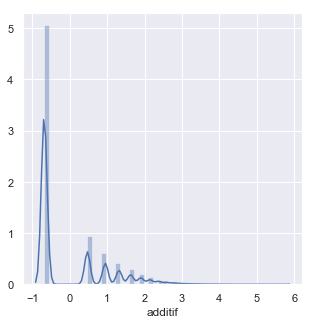

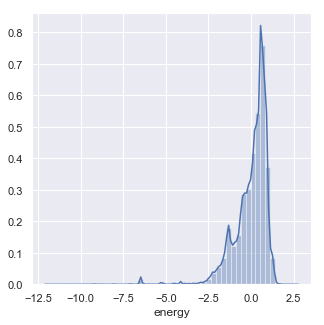

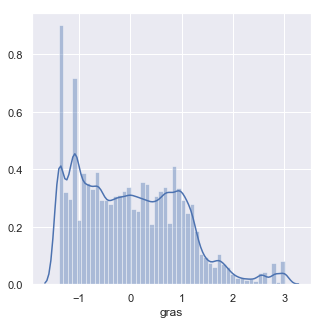

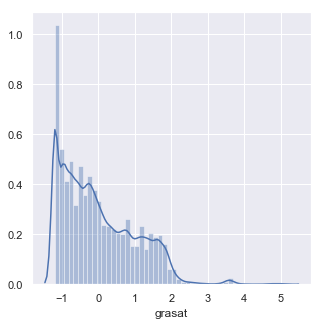

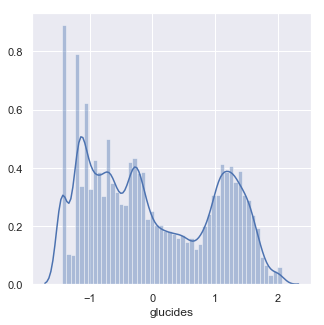

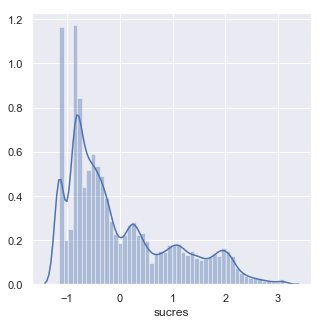

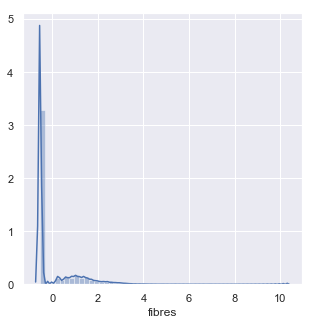

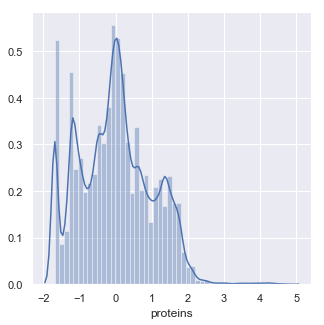

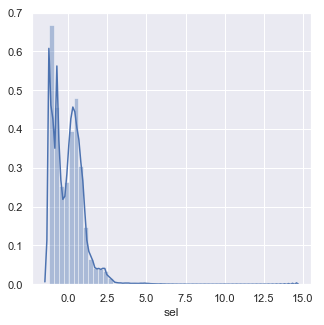

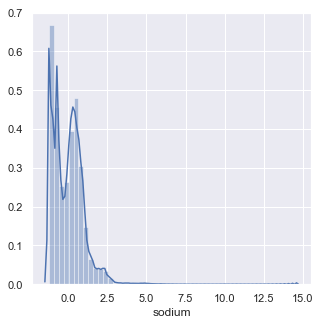

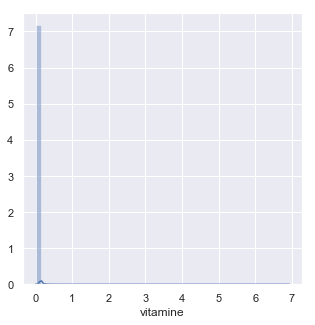

In [47]:
# Histogramme des variables quantitatives :

colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']
nb=1

for col in colonnes:    
    fig = plt.figure(figsize = (5, 5))
    sns.distplot(food[col])
    nomFig = "distplotAP{0}.png".format(nb)
    plt.savefig(nomFig, dpi=50 )
    nb +=1

### Test de Kolmogorov-Smirnovla : Teste l'adéquation à une loi normale

In [27]:
from scipy.stats import ks_2samp

# Idée :  étudier l'écart entre la fonction de répartition d'une loi normale et celle estimée de notre échantillon 
#         Plus cette quantité est grande, plus on est enclin à rejeter l'hypothèse comme quoi l'échantillon est gaussien.
#  H0:  F=F0 : l'échantillon est gaussien

# colonnes = ['additif', 'energy', 'gras', 'grasat', 'glucides', 'sucres', 'fibres', 'proteins', 'sel', 'sodium', 'vitamine']



print("additif     :  ",ks_2samp(food["additif"],list(np.random.normal(np.mean(food["additif"]), np.std(food["additif"]), 1000))))
print("energy :  ",ks_2samp(food["energy"],list(np.random.normal(np.mean(food["energy"]), np.std(food["energy"]), 1000))))
print("gras     :  ",ks_2samp(food["gras"],list(np.random.normal(np.mean(food["gras"]), np.std(food["gras"]), 1000))))
print("grasat :  ",ks_2samp(food["grasat"],list(np.random.normal(np.mean(food["grasat"]), np.std(food["grasat"]), 1000))))
print("glucides      :  ",ks_2samp(food["glucides"],list(np.random.normal(np.mean(food["glucides"]), np.std(food["glucides"]), 1000))))
print("sucres     :  ",ks_2samp(food["sucres"],list(np.random.normal(np.mean(food["sucres"]), np.std(food["sucres"]), 1000))))
print("fibres     :  ",ks_2samp(food["fibres"],list(np.random.normal(np.mean(food["fibres"]), np.std(food["fibres"]), 1000))))
print("proteins     :  ",ks_2samp(food["proteins"],list(np.random.normal(np.mean(food["proteins"]), np.std(food["proteins"]), 1000))))
print("sel     :  ",ks_2samp(food["sel"],list(np.random.normal(np.mean(food["sel"]), np.std(food["sel"]), 1000))))
print("sodium     :  ",ks_2samp(food["sodium"],list(np.random.normal(np.mean(food["sodium"]), np.std(food["sodium"]), 1000))))
print("vitamine     :  ",ks_2samp(food["vitamine"],list(np.random.normal(np.mean(food["vitamine"]), np.std(food["vitamine"]), 1000))))

# n.b:  np.std(food["xxx"])  est l'écart-type empirique



    
 additif    :   Ks_2sampResult(statistic=0.39625173290650695, pvalue=3.187495198493087e-136)
 energy     :   Ks_2sampResult(statistic=0.12413293576521106, pvalue=9.425312980497465e-14)
 gras       :   Ks_2sampResult(statistic=0.086, pvalue=8.02543184476259e-07)
 grasat     :   Ks_2sampResult(statistic=0.119, pvalue=1.131457775405139e-12)
 glucides   :   Ks_2sampResult(statistic=0.12980895646973278, pvalue=5.3418691574500816e-15)
 sucres     :   Ks_2sampResult(statistic=0.13881827178342004, pvalue=4.3110782429831427e-17)
 fibres     :   Ks_2sampResult(statistic=0.4225482567670484, pvalue=7.61148860279474e-155)
 proteins   :   Ks_2sampResult(statistic=0.05226306617960269, pvalue=0.008683723875325303)
 sel        :   Ks_2sampResult(statistic=0.117, pvalue=2.8963824712316685e-12)
 sodium     :   Ks_2sampResult(statistic=0.09981748869469437, pvalue=4.8294059334617e-09)
 vitamine   :   Ks_2sampResult(statistic=0.496, pvalue=3.386377723914875e-213)

    => On peut rejetter l’hypothèse de normalité au niveau de test 5% étant donnée la p-value de toutes les variables :
        
        

additif     :   Ks_2sampResult(statistic=0.38025173290650693, pvalue=1.7726130020223888e-125)
energy :   Ks_2sampResult(statistic=0.1267810449501534, pvalue=2.5097848385159754e-14)
gras     :   Ks_2sampResult(statistic=0.076, pvalue=2.0209431716246945e-05)
grasat :   Ks_2sampResult(statistic=0.1280983077538692, pvalue=1.2860656341463717e-14)
glucides      :   Ks_2sampResult(statistic=0.12098312056554494, pvalue=4.3856547062608524e-13)
sucres     :   Ks_2sampResult(statistic=0.128, pvalue=1.3521891021289255e-14)
fibres     :   Ks_2sampResult(statistic=0.41054825676704837, pvalue=3.3704577699469472e-146)
proteins     :   Ks_2sampResult(statistic=0.045, pvalue=0.03545442635988874)
sel     :   Ks_2sampResult(statistic=0.105, pvalue=5.832617418735357e-10)
sodium     :   Ks_2sampResult(statistic=0.099, pvalue=6.675158276218463e-09)
vitamine     :   Ks_2sampResult(statistic=0.49539799408811036, pvalue=1.1115069733377613e-212)


### ANOVA

In [28]:
# Le test ANOVA n'a pas de sens car aucune des variables quantitatives ne suit une distribution Gausienne.

anova = smf.ols('sodium~nutrigrade', data=food).fit()   # Calcul des moindres carrés
print(anova.summary())   # tableau d'analyse de la variance
print("\n\n")
print(sm.stats.anova_lm(anova, typ=2))

                            OLS Regression Results                            
Dep. Variable:                 sodium   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5391.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        07:41:55   Log-Likelihood:            -3.1947e+05
No. Observations:              232413   AIC:                         6.389e+05
Df Residuals:                  232408   BIC:                         6.390e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5615      0.005   -1

NameError: name 'sm' is not defined

## Fonctions d'affichage

In [29]:
# DERNIERE VERSION

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import random
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, plan=1):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            color = ['red','blue','green','red','blue','green','red', 'blue', 'green', 'red', 'blue', 'green' ]

            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        #plt.text(x, y, labels[i], fontsize='18', ha='center', va='center', rotation=label_rotation, color="steelblue", alpha=0.5)
                        plt.text(x, y, labels[i], fontsize='18', ha='center', va='center', rotation=label_rotation, color=color[i], alpha=0.5)
    
        
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            nomFig = "cercle{0}.png".format(plan)
            plt.savefig(nomFig, dpi=60 )
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, \
                             illustrative_var=None, grade=None, cluster=None, taille_point=10, plan="0"):
    
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,7))
        
            color = ['black','yellowgreen','red','blue','orange','purple','green','cyan','azure','magenta','violet',\
                     'chartreuse','springgreen','indigo', 'brown','cadetblue','coral','cornflowerblue', 'cornsilk',\
                     'chocolate','tan','steelblue','turquoise', 'wheat', 'whitesmoke', \
                     'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', \
                     'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', \
                     'teal', 'thistle', 'tomato']            # le 'yellowgreen' est plus visible que le 'yellow'
        
            i=0
            
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, s=taille_point)
            else:
                illustrative_var = np.array(illustrative_var)
                
                if grade is not None:
                    selected = np.where(illustrative_var == grade)
                    j=random.randint(0, 42)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=grade, c=[color[j]], s=taille_point)
                elif cluster is not None:
                    selected = np.where(illustrative_var == cluster)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=cluster, marker='x', s=taille_point)
                else:
                    for value in np.unique(illustrative_var):
                        selected = np.where(illustrative_var == value)
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=[color[i]], s=taille_point)
                        i+=1
                        #i+=2

            plt.legend(fontsize=20)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                     #plt.text(x+0.3, y+0.3, labels[i], fontsize='10', ha='center',va='center') 
                     plt.text(x+0.1, y+0.1, labels[i], fontsize='10', ha='center',va='center') 

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            nomFig = "plan_fact{0}.png".format(plan)
            plt.savefig(nomFig, dpi=60 )
            plt.show(block=False)



# ----------------------------------------------------------------------------------------------------
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(15,10))   # largeur, hauteur
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig( "eboulis.png", dpi=50 )
    plt.show(block=False)

# ----------------------------------------------------------------------------------------------------
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()


### Obtention d'un dataset équilibré

In [30]:
# Obtenir un dataset équilibré avant l'ACP.

rep = food['nutrigrade'].value_counts(normalize=True)    # "normalize=True" pour avoir des % des classes nutrigrade

grade_min = rep.min()   # + petit %  (nutrigrade 'a')
nb_min_grade = int(grade_min*len(food) - 1)
print("Nombre de produits du nutrigrade le moins représenté =", nb_min_grade)

food_a = food[food['nutrigrade'] == 'a'].sample(nb_min_grade)   # au hasard nb_min_grade produits 'a' parmi tous les 'a'
food_b = food[food['nutrigrade'] == 'b'].sample(nb_min_grade)   # au hasard nb_min_grade produits 'a' parmi tous les 'b'
food_c = food[food['nutrigrade'] == 'c'].sample(nb_min_grade)   # au hasard nb_min_grade produits 'a' parmi tous les 'c'
food_d = food[food['nutrigrade'] == 'd'].sample(nb_min_grade)   # au hasard nb_min_grade produits 'a' parmi tous les 'd'
food_e = food[food['nutrigrade'] == 'e'].sample(nb_min_grade)   # au hasard nb_min_grade produits 'a' parmi tous les 'e'

# Dataframe ayant maintenant un nombre équivalent de produits 'a', 'b', 'c', 'd' ou 'e'
food_equi =  pd.concat([pd.concat([pd.concat([pd.concat([food_a, food_b]), food_c]), food_d]), food_e], ignore_index = True)

print("Taille de food_equi=", len(food_equi))
print(food_equi.nutrigrade.value_counts(normalize=True))   # vérification de l'équilibre de la classe 'nutrigrade'


Nombre de produits du nutrigrade le moins représenté = 29355
Taille de food_equi= 146775
c    0.2
d    0.2
b    0.2
a    0.2
e    0.2
Name: nutrigrade, dtype: float64


## Analyse en Composantes Principales

% de variance associées aux axes factoriels F1, F2, F3, F4, F5, F6 :
 [0.30618836 0.23091214 0.13571204 0.11275143 0.08797652 0.06304767]
Variance cumulée = 0.9365881466046831


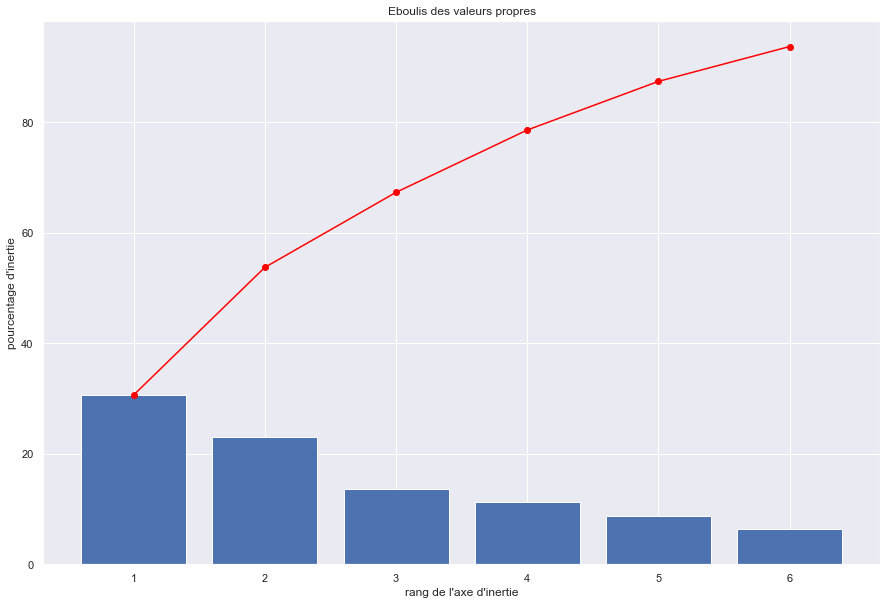

In [31]:
# La normalisation a été faite avant l'ACP

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6


# Option_1 : toutes les variables quant sauf 'vitamine'
# grade = food["nutrigrade"]
# data_pca = food[['additif','energy','gras','grasat','glucides','sucres','sel','sodium','fibres','proteins']]

# Option_2 : dataset équilibré
grade = food_equi["nutrigrade"]
data_pca = food_equi[['additif','energy','gras','grasat','glucides','sucres','sel','sodium','fibres','proteins']]

# data_pca.replace([np.inf, -np.inf], np.nan, inplace=True)

# Préparation des données pour l'ACP
X = data_pca.values     # conversion en numpy.ndarray => suppression du nom de colonne et ligne
features = data_pca.columns

np.nan_to_num(X, copy=False)   # ValueError: Input contains NaN


# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X) 
coord = pca.fit_transform(X)            # retourne les coordonnées factorielles
# print(coord)


# proportions de variance associées aux axes:
print("% de variance associées aux axes factoriels F1, F2, F3, F4, F5, F6 :\n", pca.explained_variance_ratio_)

print("Variance cumulée =", pca.explained_variance_ratio_.sum())  # Variance expliquée cumulée = 1
# print(pca.explained_variance_), 5, 6

# La 1ère composante explique 32.17% de la variance observée, la 2nd explique 22.58%, soit 54.75% de l'inertie totale


# --- Eboulis des valeurs propres :  - Pourcentage d’inertie totale associé à chaque axe (en bleu)
#                                    - Somme cumulée des inerties                        (en rouge)
display_scree_plot(pca)


In [32]:
#  test des bâtons brisés

n = data_pca.shape[0]   # nombre d'observations
p = data_pca.shape[1]   # nombre de variables

eigval = (n-1)/n*pca.explained_variance_   # valeur corrigée

# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)

# bs = bs[::-1]
bs = bs[0:6]   # 'bs' doit avoir la même taille que 'eigval'

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))
# len(eigval)   # 6
# len(bs)       # 11

# Critère de Kaiser – Guttman :  Retenir les k composants ayant une valeur propre supérieure à 1. => F1,F2,F3,F4


   Val.Propre    Seuils
0    2.965677  0.100000
1    2.236567  0.211111
2    1.314479  0.336111
3    1.092087  0.478968
4    0.852122  0.645635
5    0.610667  0.845635


## Projection des variables : Cercle des corrélations

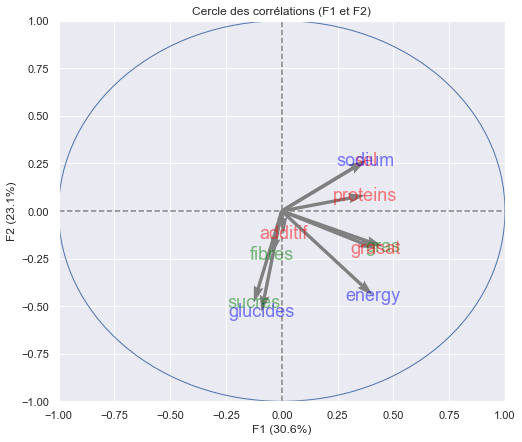

In [33]:
pcs = pca.components_

# 1er plan factoriel
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features), plan=1)

# Le 1er plan factoriel (F1+F2) représente 54.8% de l'inertie totale => 54.8% de la variance
# En conservant les deux premiers axes on va expliquer 54.8% de l’inertie totale du nuage de point. 


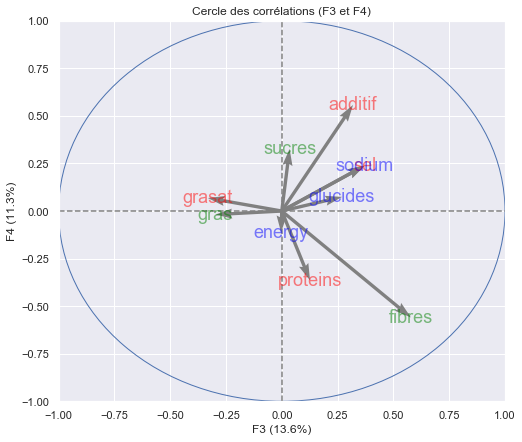

In [34]:
# 2ème plan factoriel
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features), plan=2)


# Le 2ème plan factoriel (F3+F4) représente 24.2% de l'inertie totale


In [35]:
# Combinaisons linéaires des variables,

#  ['additif',  'energy',   'gras',     'grasat',   'glucides',  'sucres',  'sel',      'sodium',   'fibres',   'proteins'

# F1 =   0.45*gras + 0.42*grasat + 0.40*energy + 0.37*sel + 0.37*sodium + 0.37*proteins + 0.01*additif
#      - 0.12*sucres - 0.09*glucides - 0.04*fibres 
       
   
# F2 =   0.26*sel + 0.26*sodium + 0.08*proteins
#      - 0.52*glucides - 0.47*sucres - 0.44*energy - 0.22*fibres - 0.20*grasat - 0.19*gras - 0.11*additif 

     
# F3 =   0.57*fibres + 0.37*sel + 0.37*sodium + 0.32*additif + 0.27*glucides + 0.12*proteins + 0.04*sucres
#       - 0.33*grasat - 0.29*gras - 0.001*energy
 
 
# F4 =   0.55*additif + 0.33*sucres + 0.23*sel + 0.23*sodium + 0.07*grasat + 0.07*glucides
#      - 0.56*fibres - 0.36*proteins - 0.11*energy - 0.01*gras

    
F1 = pca.components_[0]; print("F1 =",F1)
F2 = pca.components_[1]; print("F2 =",F2)
F3 = pca.components_[2]; print("F3 =",F3)
F4 = pca.components_[3]; print("F4 =",F4)


F1 = [ 0.00901023  0.40877752  0.45301414  0.42152234 -0.091378   -0.12530222
  0.37697147  0.37697389 -0.04376011  0.37381082]
F2 = [-0.12023568 -0.44438555 -0.18677713 -0.1977807  -0.53027651 -0.48166917
  0.26615081  0.26615877 -0.22847323  0.0835873 ]
F3 = [ 0.31913919 -0.00322246 -0.29733029 -0.33106956  0.26992167  0.03502583
  0.37106962  0.37107369  0.57848941  0.12650923]
F4 = [ 0.55753419 -0.11197357 -0.01840224  0.06837257  0.07437026  0.32684474
  0.23844357  0.23843863 -0.55922035 -0.364431  ]


## Projection des produits

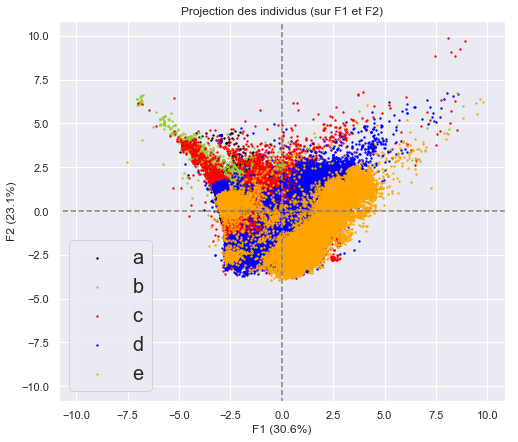

In [36]:
# Projection de tous les Produits sur le 1er plan factoriel (F1,F2) :
# X_projected = pca.transform(X_scaled)
X_projected = pca.transform(X)

# grade = data_pca["nutrigrade"]   # a,b,c,d,e

display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = grade, alpha = 0.9, taille_point=2, plan="1")


# trop de points => filtrer sur le nutrigrade)


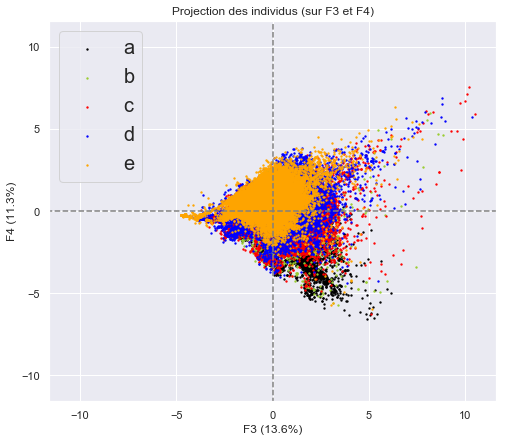

In [37]:
# Projection de tous les Produits sur le 2eme plan factoriel (F3,F4) :

display_factorial_planes(X_projected, n_comp, pca, [(2,3)], illustrative_var = grade, alpha = 0.9, taille_point=2, plan="2")


## Projection des produits par nutrigrade

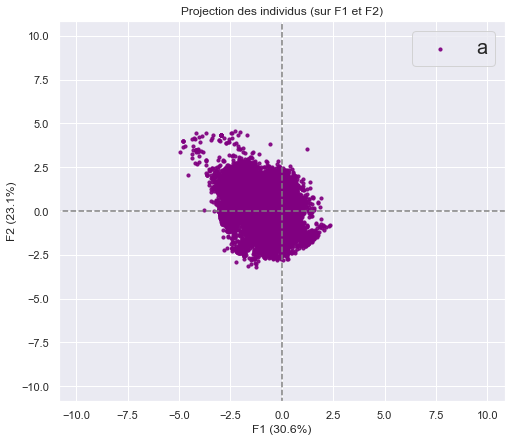

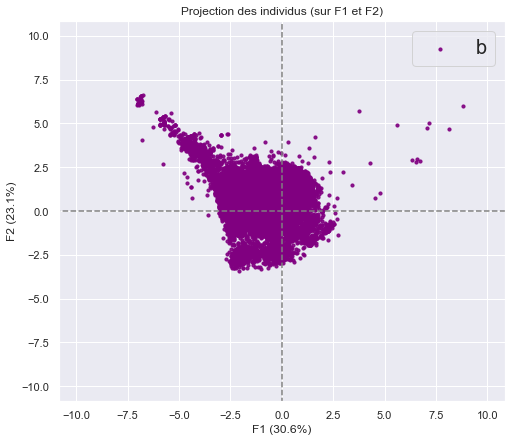

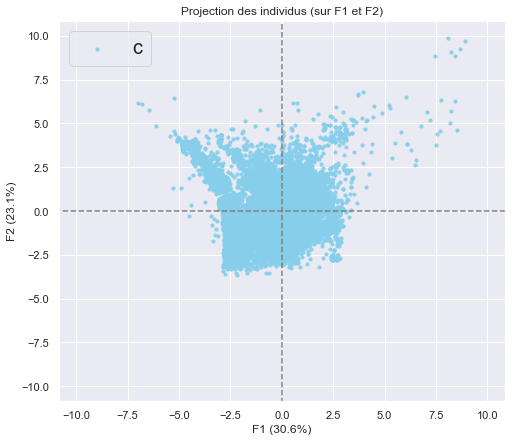

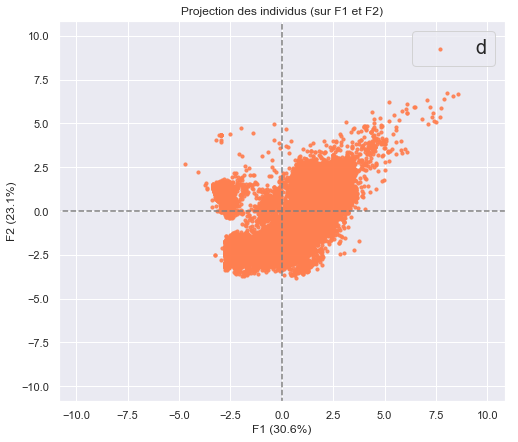

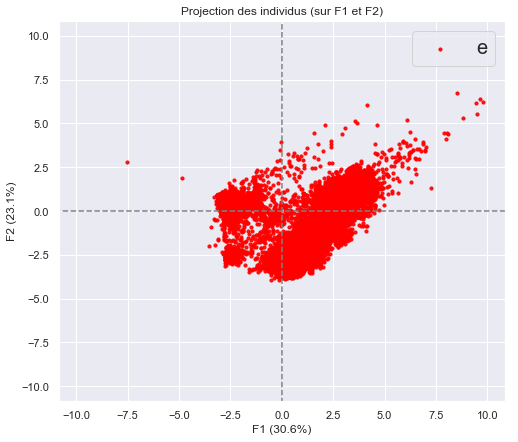

In [38]:
# ... sur le 1er Plan factoriel

# Colore selon le nutrigrade du produit
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=grade, alpha=0.9, grade='a', plan="1a")
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=grade, alpha=0.9, grade='b', plan="1b")
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=grade, alpha=0.9, grade='c', plan="1c")
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=grade, alpha=0.9, grade='d', plan="1d")
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=grade, alpha=0.9, grade='e', plan="1e")
plt.show()


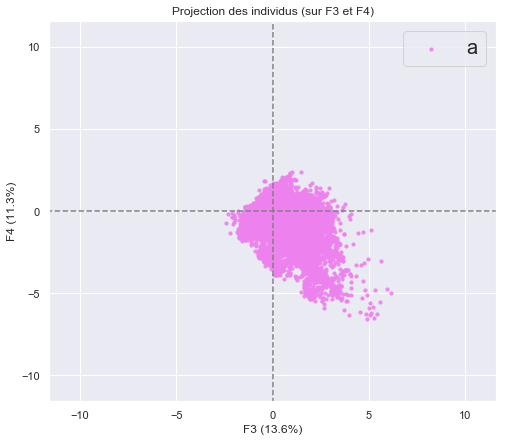

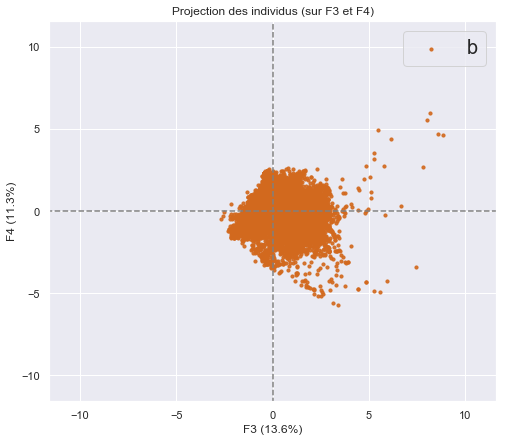

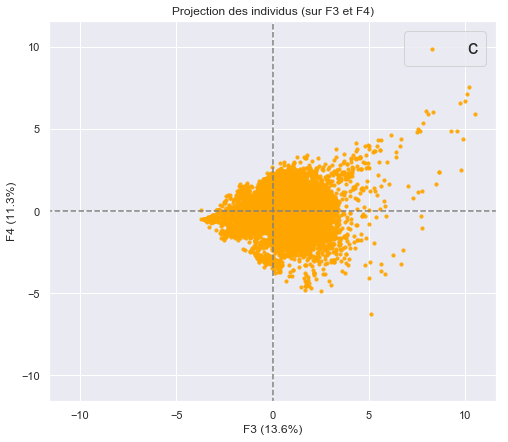

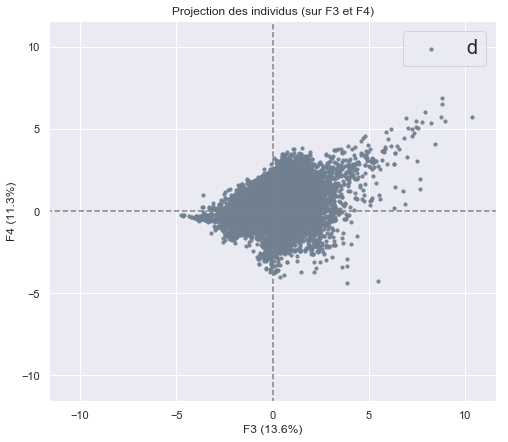

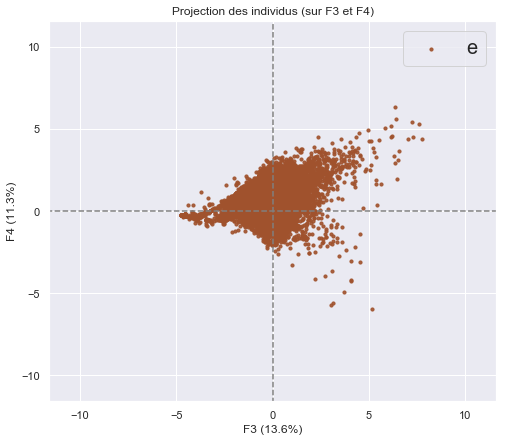

In [39]:
# ... sur le 2eme Plan factoriel

# Colore selon le nutrigrade du produit
display_factorial_planes(X_projected,n_comp,pca,[(2,3)], illustrative_var=grade, alpha=0.9, grade="a", plan="2a")
display_factorial_planes(X_projected,n_comp,pca,[(2,3)], illustrative_var=grade, alpha=0.9, grade="b", plan="2b")
display_factorial_planes(X_projected,n_comp,pca,[(2,3)], illustrative_var=grade, alpha=0.9, grade="c", plan="2c")
display_factorial_planes(X_projected,n_comp,pca,[(2,3)], illustrative_var=grade, alpha=0.9, grade="d", plan="2d")
display_factorial_planes(X_projected,n_comp,pca,[(2,3)], illustrative_var=grade, alpha=0.9, grade="e", plan="2e")

plt.show()

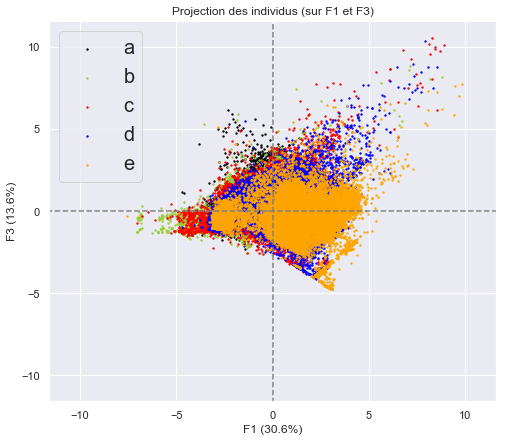

In [40]:
# Test

display_factorial_planes(X_projected, n_comp, pca, [(0,2)], illustrative_var = grade, alpha = 0.9, taille_point=2, plan="1")



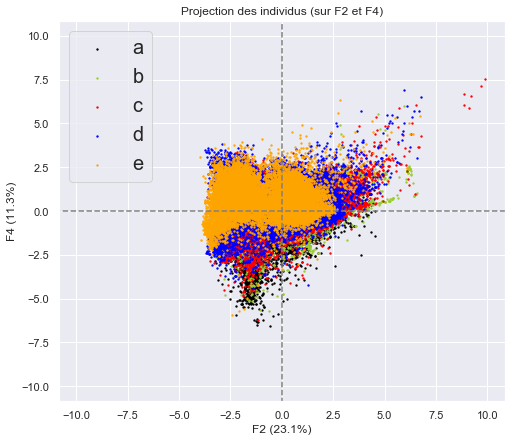

In [41]:
# Test

display_factorial_planes(X_projected, n_comp, pca, [(1,3)], illustrative_var = grade, alpha = 0.9, taille_point=2, plan="1")

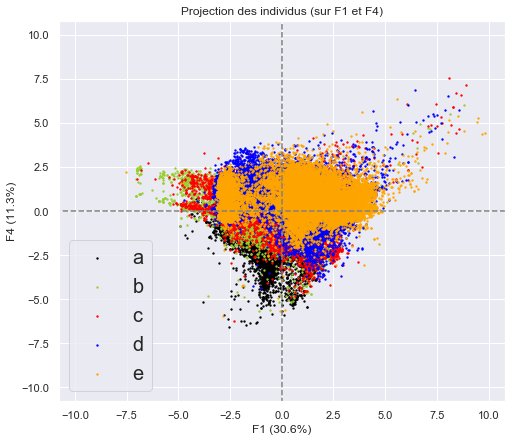

In [42]:
# Test

display_factorial_planes(X_projected, n_comp, pca, [(0,3)], illustrative_var = grade, alpha = 0.9, taille_point=2, plan="1")

# .......... FIN